In [83]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

sns.set_context('talk', font_scale=1.4)
sns.set(rc={'figure.figsize': (25, 15)})

import WineDataSet
w = WineDataSet.WineDataSet()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
display(w.ds['fixed acidity'].skew())

1.7232896467669239

In [85]:
display(w.ds['fixed acidity'].kurt())

5.061160665014649

In [86]:
display(w.ds.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label',
       'sweetness', 'alcohol_label', 'cals from alcohol', 'cals from sugar',
       'total calories', 'total acidity', 'above_so2_limit'],
      dtype='object')

In [87]:

model = LinearRegression(fit_intercept=True)

# getting dataset copy with only relevant parameters
X = w.get_ml_copy()

y = w.ds['quality']

print(X.shape)
print(y.shape)


(6497, 6)
(6497,)


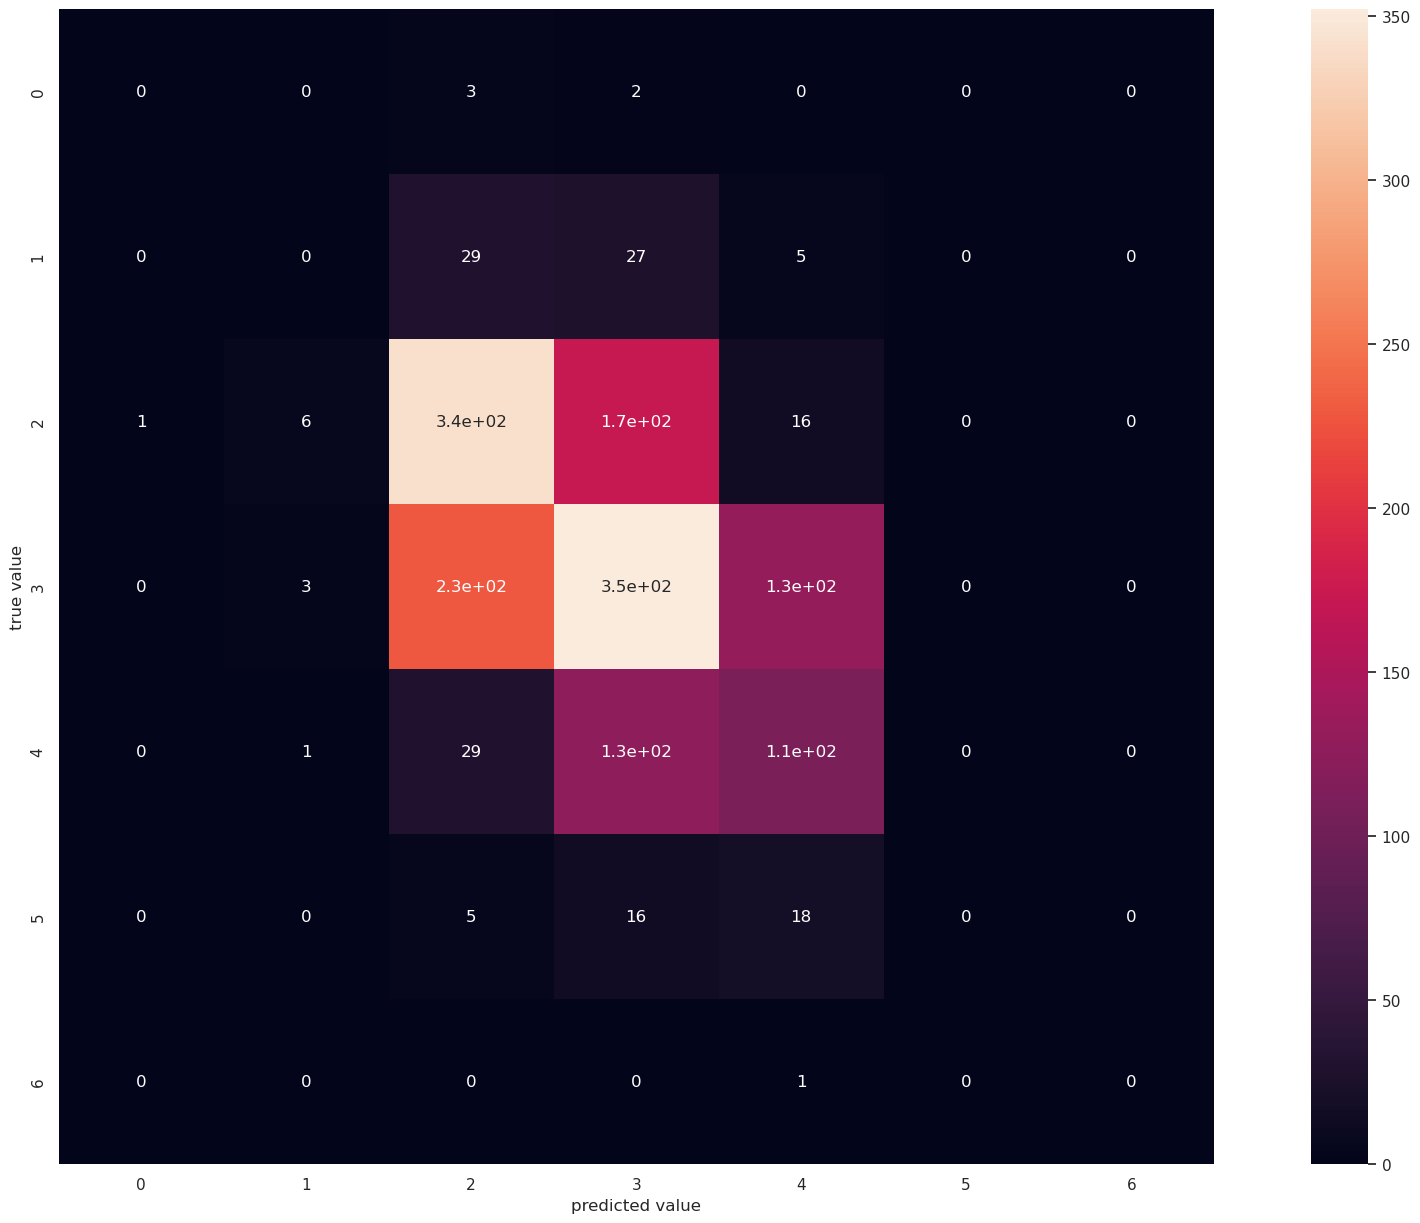

In [91]:
# getting dataset copy with only relevant parameters
X = w.get_ml_copy()

m = model.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = GaussianNB()                        # 2. instantiate model
model.fit(X_train, y_train)                 # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data
#print(accuracy_score(y_test, y_model))


from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');



array([[-8.18139981e+01,  9.34923911e-03],
       [-4.88163138e+01, -7.17410645e-01],
       [-6.18172739e+01, -4.67639423e-01],
       ...,
       [-4.91176001e+00, -3.93494561e+00],
       [-5.93434576e+00, -4.26998578e+00],
       [-1.79304623e+01, -3.98041317e+00]])

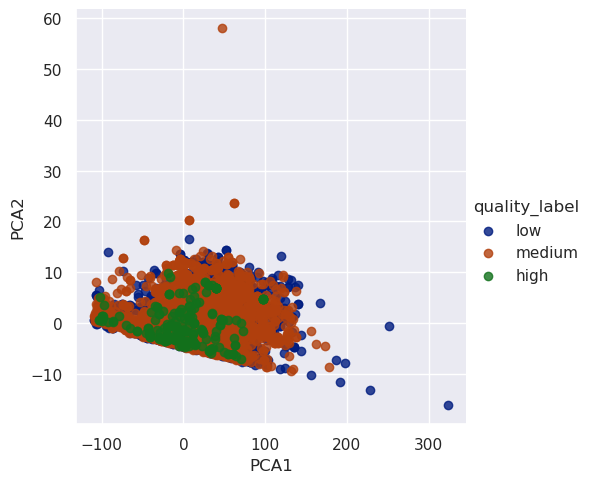

In [89]:
# Unsupervised: decrease data set dimensionality

# getting dataset copy with only relevant parameters
X = w.get_ml_copy()

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions
display(X_2D)



w.ds['PCA1'] = X_2D[:, 0]
w.ds['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='quality_label', data=w.ds, fit_reg=False);




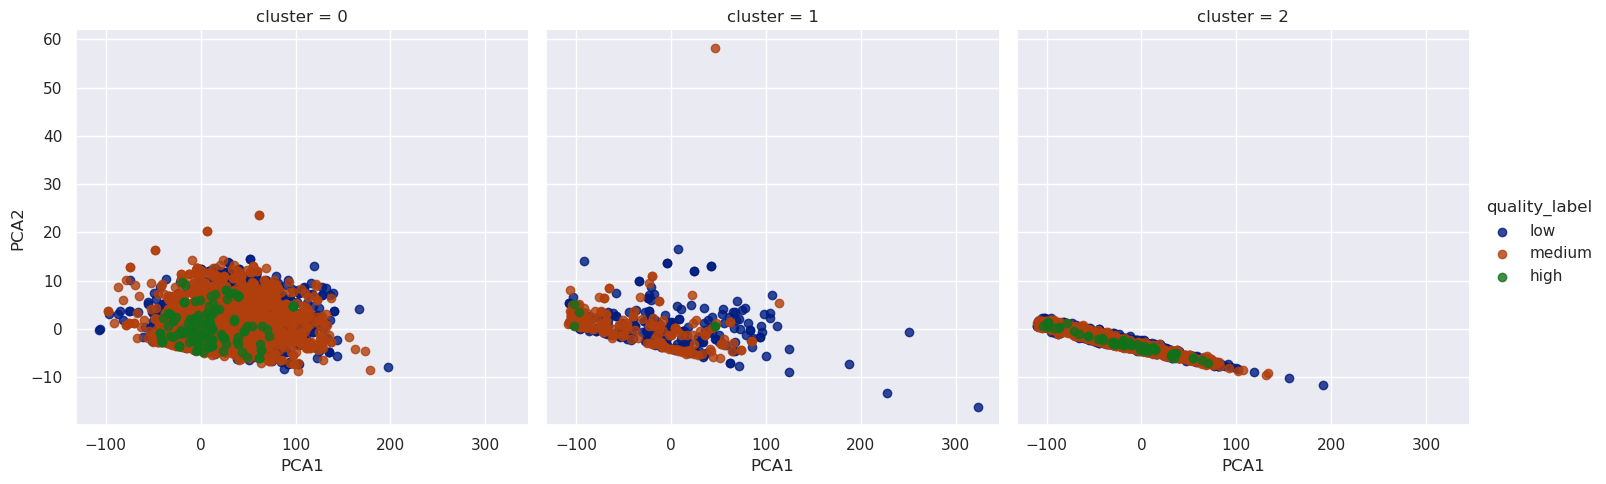

In [90]:
# CLUSTERING: Gaussian mixture
from sklearn.mixture import GaussianMixture      # 1. Choose the model class

# getting dataset copy with only relevant parameters
X = w.get_ml_copy()

model = GaussianMixture(n_components=3,  covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)        # 4. Determine cluster labels


w.ds['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=w.ds, hue='quality_label', col='cluster', fit_reg=False);